# CS 4820
# Assignment 8: Convolving a Color Image

### Load a Color Image

In [1]:
# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the color image `face` from from [`scipy.misc`](https://docs.scipy.org/doc/scipy/reference/misc.html) plot it as a 9*12 picture.

![raccoon](./assets/raccoon.png)

Reshape the image such that it is convolution-ready. Note: since `face` is a RGB color image, it has __three color channels__.

In [2]:
from scipy import misc
import matplotlib.pyplot as plt

img = misc.face()

plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')

print(img.shape)

img_tensor = img.reshape((1,768,1024,3))

<Figure size 700x700 with 0 Axes>

(768, 1024, 3)


### One convolutional Layer

Convolve the `face` image you loaded above with a model of one convolutional layer:

- 2 fiters
- each filter of size $9 * 12$
- each filter is initialized with `RandomUniform` and uses `relu` activation function

In [3]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()

model.add(Conv2D(2, (9, 12), kernel_initializer='RandomNormal', input_shape=(768, 1024, 3), activation='relu'))

model.compile('adam', 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 760, 1013, 2)      650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Param # = 650` on this convolutional layer?__

__A:__ 


- None is the numeber of output images (N).
- 760 by 1013 is the size of the output feature map.  
- 2 is the number of output channels.


$$ Param \# = Weight \# + Theta \# = H_f * W_f * C_o * C_i + C_o = 9 * 12 * 2 * 3 + 2 = 650 $$

Visualize both output images after `face` is covolved.

In [5]:
img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 760, 1013, 2)

(<matplotlib.image.AxesImage at 0x1f1f9430a88>,
 (-0.5, 1012.5, 759.5, -0.5),
 Text(0.5, 1.0, '1st Output Image'))

(<matplotlib.image.AxesImage at 0x1f1f948c7c8>,
 (-0.5, 1012.5, 759.5, -0.5),
 Text(0.5, 1.0, '2nd Output Image'))

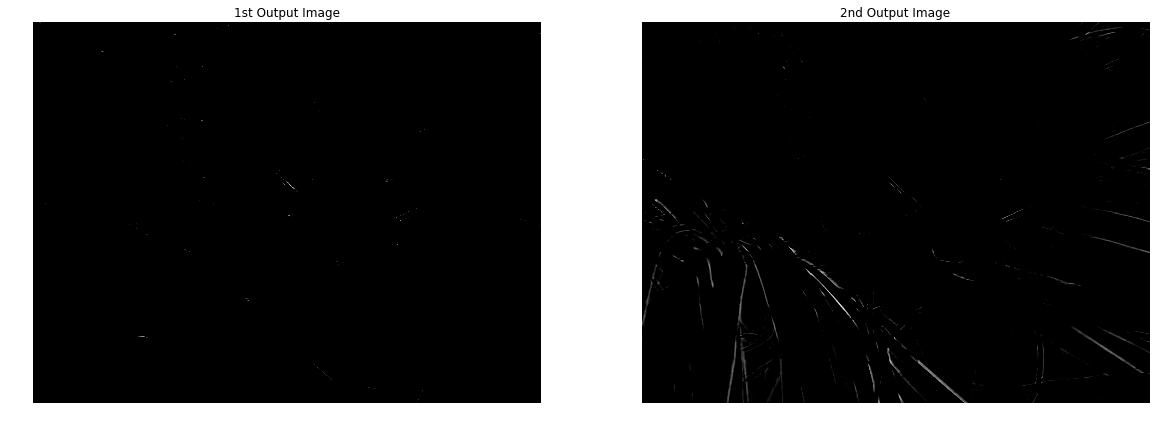

In [6]:
img_pred_1 = img_pred_tensor[0, :, :, 0]
img_pred_2 = img_pred_tensor[0, :, :, 1]

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img_pred_1, cmap='gray'), ax[0].axis('off'), ax[0].set_title('1st Output Image')
ax[1].imshow(img_pred_2, cmap='gray'), ax[1].axis('off'), ax[1].set_title('2nd Output Image')

### Stacking Multiple Convolutional Layers

Create another model of two convolutional layers.
- The first layer is the same as above
- The second layer has
    - 3 fiters
    - each filter of size $3 * 4$
    - each filter is initialized with `RandomUniform` and uses `relu` activation function

In [7]:
model_2 = Sequential()

model_2.add(Conv2D(2, (9, 12), kernel_initializer='RandomNormal', input_shape=(768, 1024, 3), activation='relu'))
model_2.add(Conv2D(3, (3, 4), kernel_initializer='RandomNormal', activation='relu'))

model_2.compile('adam', 'mse')

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 760, 1013, 2)      650       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 758, 1010, 3)      75        
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Param # = 75` on the second convolutional layer?__

__A:__ 


- None is the numeber of output images (N).
- 758 by 1010 is the size of the output feature map.  
- 3 is the number of output channels.


$$ Param \# = Weight \# + Theta \# = H_f * W_f * C_o * C_i + C_o = 3 * 4 * 2 * 3 + 3 = 75 $$

Visualize all three output images after `face` is covolved.

In [8]:
img_pred_tensor_2 = model_2.predict(img_tensor)

img_pred_tensor_2.shape

(1, 758, 1010, 3)

(<matplotlib.image.AxesImage at 0x1f1f95f7648>,
 (-0.5, 1009.5, 757.5, -0.5),
 Text(0.5, 1.0, '1st Output Image'))

(<matplotlib.image.AxesImage at 0x1f1f967b308>,
 (-0.5, 1009.5, 757.5, -0.5),
 Text(0.5, 1.0, '2nd Output Image'))

(<matplotlib.image.AxesImage at 0x1f1f9680608>,
 (-0.5, 1009.5, 757.5, -0.5),
 Text(0.5, 1.0, '3rd Output Image'))

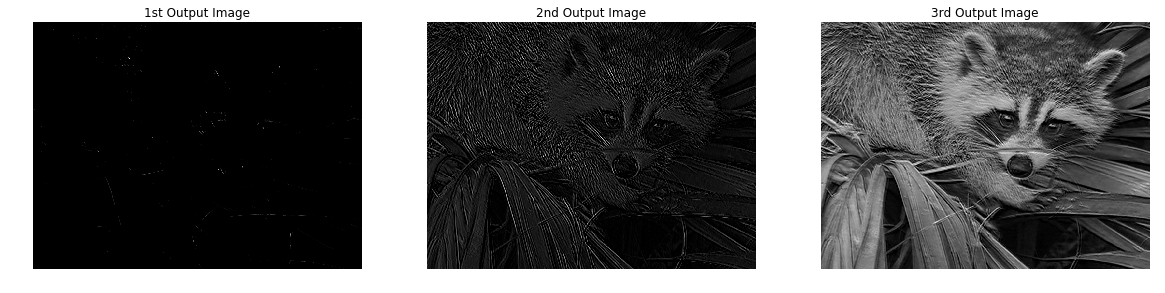

In [9]:
img_pred2_1 = img_pred_tensor_2[0, :, :, 0]
img_pred2_2 = img_pred_tensor_2[0, :, :, 1]
img_pred2_3 = img_pred_tensor_2[0, :, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img_pred2_1, cmap='gray'), ax[0].axis('off'), ax[0].set_title('1st Output Image')
ax[1].imshow(img_pred2_2, cmap='gray'), ax[1].axis('off'), ax[1].set_title('2nd Output Image')
ax[2].imshow(img_pred2_3, cmap='gray'), ax[2].axis('off'), ax[2].set_title('3rd Output Image')